<a href="https://colab.research.google.com/github/nmodem2k/Machine-Learning-E2E/blob/master/Multiple_linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [2]:
data=pd.read_csv('advertising.csv')

In [3]:
data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [4]:
data.tail()

,TV,Radio,Newspaper,Sales
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5
199,232.1,8.6,8.7,13.4


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [6]:
data.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


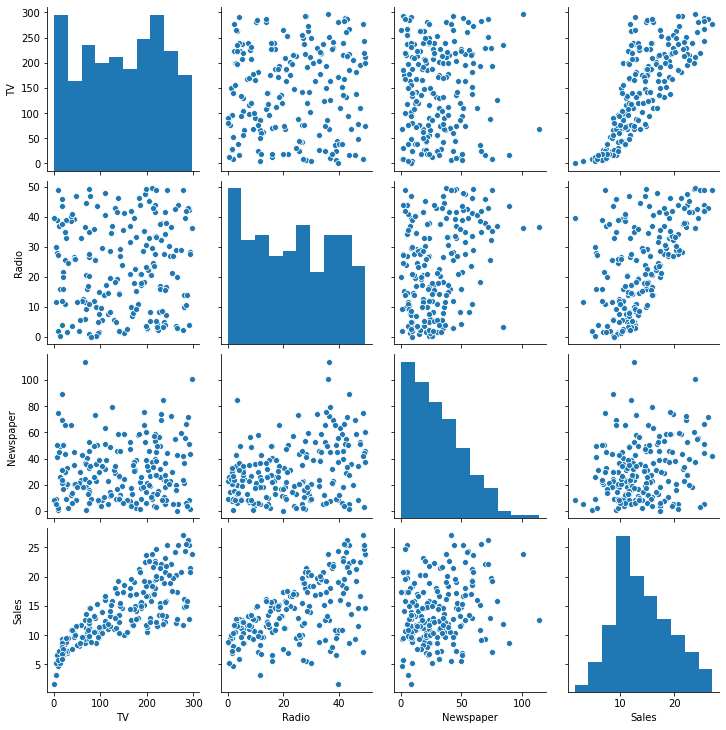

In [8]:
sns.pairplot(data)

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:2071: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


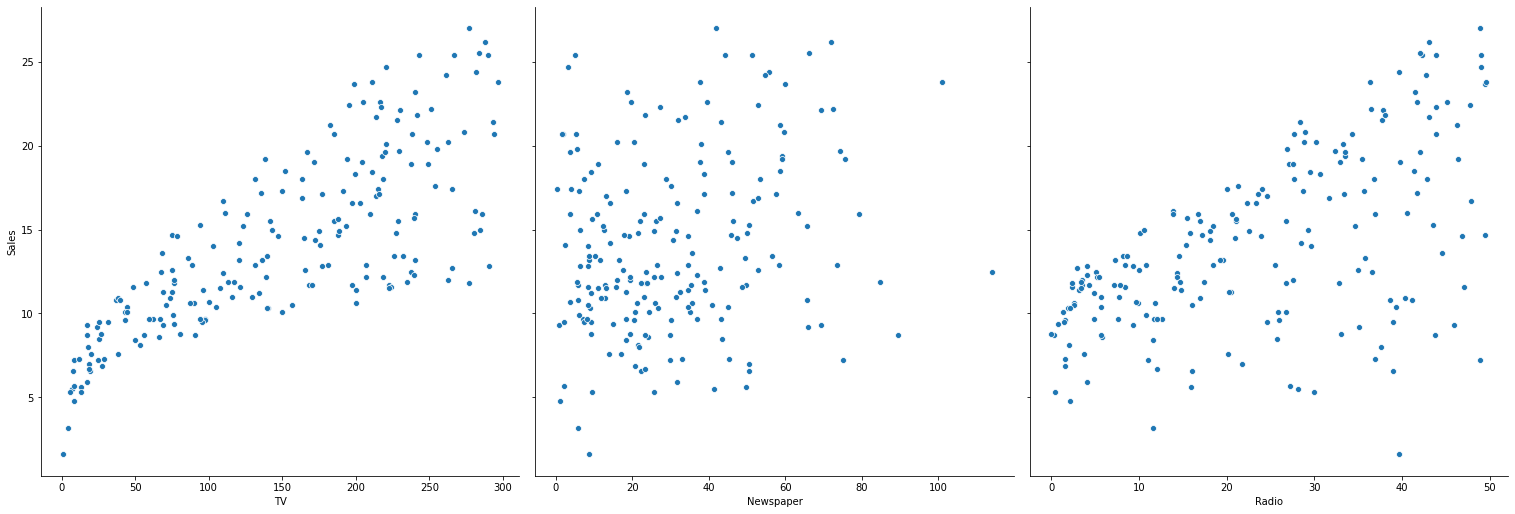

In [10]:
sns.pairplot(data,x_vars=['TV','Newspaper','Radio'],y_vars='Sales',size=7)

In [12]:
X=data[['TV','Newspaper','Radio']]
Y=data['Sales']

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=0)

In [15]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(160, 3)
(40, 3)
(160,)
(40,)


In [16]:
from sklearn.linear_model import LinearRegression

In [17]:
l=LinearRegression()

In [18]:
l.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [19]:
print(l.intercept_)

2.99489303049533


In [20]:
l.coef_

array([ 0.04458402, -0.00278146,  0.19649703])

In [26]:
pd.DataFrame(l.coef_,X_test.columns,columns=['Coefficient'])

,Coefficient
TV,0.044584
Newspaper,-0.002781
Radio,0.196497


In [27]:
y_pred=l.predict(X_test)

In [28]:
y_pred

array([10.05739563,  7.4522807 ,  7.0197076 , 24.08029725, 12.01786259,
        6.53793858, 12.78286918, 15.10974587, 10.76974013, 16.34357951,
       22.88297477,  9.12924467, 10.46455672, 15.48743552, 11.58555633,
       12.17296914, 18.76551502, 10.78318566, 15.90515992, 17.30651279,
       24.06692057,  9.59834224, 15.13512211, 12.38591525,  5.71360885,
       15.24749314, 12.29402334, 20.9421167 , 13.40991558,  9.04348832,
       12.89239415, 21.40272028, 18.13802209, 21.17320803,  6.56974433,
        6.14114206,  7.89018394, 13.01541434, 14.68953791,  6.18835143])

In [29]:
from sklearn.metrics import r2_score,mean_squared_error

In [30]:
print(mean_squared_error(y_pred,Y_test))
print(r2_score(y_pred,Y_test))

4.402118291449685
0.8330284237692487


In [31]:
import statsmodels.api as sm

In [32]:
X1=sm.add_constant(X_train)

In [34]:
l1=sm.OLS(Y_train,X1).fit()

In [35]:
l1.params

const        2.994893
TV           0.044584
Newspaper   -0.002781
Radio        0.196497
dtype: float64

In [36]:
l1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.907
Model:                            OLS   Adj. R-squared:                  0.905
Method:                 Least Squares   F-statistic:                     505.4
Date:                Wed, 15 Jul 2020   Prob (F-statistic):           4.23e-80
Time:                        16:47:25   Log-Likelihood:                -297.29
No. Observations:                 160   AIC:                             602.6
Df Residuals:                     156   BIC:                             614.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.9949      0.330      9.076      0.000       2.343       3.647
TV             0.0446      0.001     30.212      0.000       0.042       0.047
Newspaper     -0.0028      0.006     -0.451      0.653      -0.015       0.009
Radio          0.1965      0.009     21.994      0.000       0.179       0.214
==============================================================================
Omnibus:                       13.557   Durbin-Watson:                   2.038
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               15.174
Skew:                          -0.754   Prob(JB):                     0.000507
Kurtosis:                       2.990   Cond. No.                         468.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

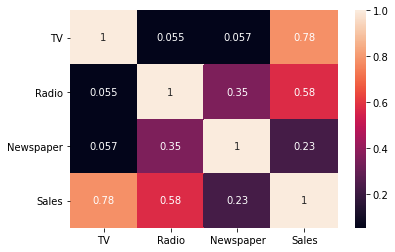

In [39]:
sns.heatmap(data.corr(),annot=True)

In [41]:
X_train1=X_train[['TV','Radio']]
X_test1=X_test[['TV','Radio']]

In [43]:
l.fit(X_train1,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [45]:
y_pred1=l.predict(X_test1)

In [46]:
r2_score(y_pred1,Y_test)

0.8330219390590403

In [48]:
Y_test.shape

(40,)

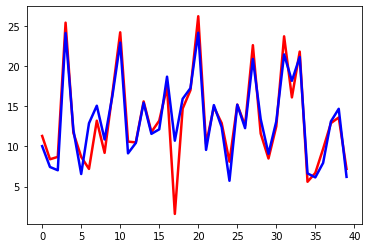

In [49]:
c=[i for i in range(40)]
plt.plot(c,Y_test,color="red",linewidth=2.5,linestyle="-")
plt.plot(c,y_pred1,color="blue",linewidth=2.5,linestyle="-")

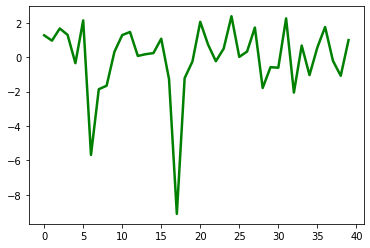

In [50]:
plt.plot(c,Y_test-y_pred1,color="green",linewidth=2.5,linestyle="-")

In [52]:
import statsmodels.api as sm

In [53]:
X=sm.add_constant(X_train1)

l=sm.OLS(Y_test,X_test1).fit()

In [54]:
l.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  Sales   R-squared (uncentered):                   0.973
Model:                            OLS   Adj. R-squared (uncentered):              0.972
Method:                 Least Squares   F-statistic:                              697.2
Date:                Wed, 15 Jul 2020   Prob (F-statistic):                    1.12e-30
Time:                        17:16:29   Log-Likelihood:                         -90.805
No. Observations:                  40   AIC:                                      185.6
Df Residuals:                      38   BIC:                                      189.0
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
TV             0.0593      0.003     17.282      0.000       0.052       0.066
Radio          0.2101      0.020     10.512      0.000       0.170       0.251
==============================================================================
Omnibus:                        7.663   Durbin-Watson:                   1.505
Prob(Omnibus):                  0.022   Jarque-Bera (JB):                6.496
Skew:                          -0.797   Prob(JB):                       0.0389
Kurtosis:                       4.166   Cond. No.                         8.52
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""